# Notebook Setup

Importing libraries

In [1]:
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

from ml_final_project.config import PROCESSED_DATA_DIR, MPL_STYLE_DIR

# Custom plotting style
plt.style.use(MPL_STYLE_DIR / "iragca_cmr10.mplstyle")

2025-05-02 09:20:50.311 | INFO     | ml_final_project.config:<module>:11 - PROJ_ROOT path is: D:\Documents\3 Production Save Files\1 Cloned repositories\ml-final-project


Loading the data

In [2]:
data_path = PROCESSED_DATA_DIR / "CivilServiceCommission" / "civilservicecommission.parquet"

pd_data = pd.read_parquet(data_path) # Use this if you want to use pandas
pl_data = pl.read_parquet(data_path) # Use this if you want to use polars

pl_data

jobId,Agency,Region,PlaceOfAssignment,Posting Date,Closing Date,Position Title,SalaryGrade,MonthlySalary,Eligibility,Education,Training,Experience,Competency,Plantilla Item No.
i32,str,str,str,date,date,str,str,i32,str,str,str,str,str,str
4235342,"""BICOL MEDICAL CENTER""","""Region V""","""Division Office, Division of A…",2024-12-06,2024-12-16,"""NURSE III""","""14""",33843,"""PBET/LET/RA1080 Teacher""","""Bachelor's degree in""","""None Required""","""None Required""","""N/A""","""OSEC-DOHB-NURS3-390074-2015"""
4267059,"""COTABATO REGIONAL AND MEDICAL …","""Region XII""","""PETDU-CRMC Cotabato City""",2025-01-08,2025-01-18,"""Training Specialist II""","""15""",38413,"""Career Service Professional/Se…","""Bachelor'S Degree""","""Specialist II""","""1 Year Of Relevant""","""""","""OSEC-DOHB-TRNSP2-840012-2024"""
4325512,"""DEPARTMENT OF EDUCATION""","""Region XII""","""ELEMENTARY- SDO SULTAN KUDARAT""",2025-02-07,2025-02-17,"""Head Teacher IV""","""17""",47247,"""RA 1080, as amended (Teacher)""","""Bachelor's degree in Elementar…","""24 hours of relevant training""","""HT for 3 years; or MT for 2 ye…","""""","""OSEC-DECSB-HTEACH4-840037-2021"""
4347023,"""MANILA, NCR""","""NCR""","""ELEMENTARY SCHOOLS""",2025-02-19,2025-03-03,"""TEACHER III""","""13""",34421,"""RA 1080 (TEACHER)""","""BEED or Bachelor's Degree plus…","""None Required""","""2 years of relevant experience""","""Not Applicable""","""OSEC-DECSB-TCH3-33077-1998"""
4318456,"""DEPARTMENT OF EDUCATION""","""Region XI""","""Sta. Cruz National High School""",2025-02-04,2025-02-14,"""MASTER TEACHER I (Secondary Gr…","""18""",51304,"""PBET/Teacher/RA 1080""","""Bachelor of Secondary""","""None Required""","""3 Years Relevant""","""N/A""","""OSEC-DECSB-MTCHR1-750206-2021"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4247090,"""DEPARTMENT OF EDUCATION""","""Region IV""","""Schools Division of Lipa City …",2024-12-17,2024-12-27,"""Teacher II""","""12""",30705,"""RA 1080, Teacher""","""Bachelor of Secondary""","""None Required""","""1 year of relevant experience""","""N/A""","""OSEC-DECSB-TCH2-240048-2001"""
4319185,"""BUREAU OF CORRECTIONS""","""NCR""","""Bureau of Corrections""",2025-01-14,2025-01-24,"""Corrections Officer I""","""11""",29668,"""RA 1080/ CS Professional/ CSC …","""Bachelor's Degree""","""None required""","""None required""","""N/A""","""BCORB-CO1-890-2024"""
4365994,"""DEPARTMENT OF EDUCATION""","""Region V""","""Elementary""",2025-02-24,2025-03-07,"""Teacher III""","""13""",34421,"""RA 1080 (Teacher)""","""Bachelor of Elementary""","""None Required""","""2 years relevant experience""","""N/A""","""OSEC-DECSB-TCH3-391749-2020"""


# Data Analysis

## Airyll 

Visualize the daily trend of job postings:
- Group by date, either posting or closing date
- Plot using a scatterplot

In [ ]:
## code here

## Jasmine

Count the number of job postings per region
- Maybe use a barplot

In [ ]:
## code here

## Kobe

Count jobs posts per agency
- Maybe use a barplot

In [ ]:
## code here

## Visaviern

Visualize the most common job post positions
- Maybe use a wordcloud

In [ ]:
## code here

## Irag



In [31]:
pl_data.filter(pl.col("Posting Date") > pl.lit("2024-04-01", pl.Date)).filter(pl.col("Posting Date") < pl.lit("2025-01-01", pl.Date))

jobId,Agency,Region,PlaceOfAssignment,Posting Date,Closing Date,Position Title,SalaryGrade,MonthlySalary,Eligibility,Education,Training,Experience,Competency,Plantilla Item No.
i32,str,str,str,date,date,str,str,i32,str,str,str,str,str,str
4235342,"""BICOL MEDICAL CENTER""","""Region V""","""Division Office, Division of A…",2024-12-06,2024-12-16,"""NURSE III""","""14""",33843,"""PBET/LET/RA1080 Teacher""","""Bachelor's degree in""","""None Required""","""None Required""","""N/A""","""OSEC-DOHB-NURS3-390074-2015"""
4250687,"""CGO NAVOTAS, CITY""","""NCR""","""City Health Office""",2024-12-17,2025-01-02,"""Midwife II""","""11""",28512,"""RA 1080""","""Completion of the Midwifery Co…","""8 hours of relevant training""","""2 years of relevant experience""","""""","""67"""
4234044,"""DEPARTMENT OF EDUCATION""","""Region IV""","""SDO""",2024-12-05,2024-12-15,"""Teacher II""","""12""",30705,"""RA 1080""","""Bachelor of Elementary""","""none required""","""1 year relevant experience""","""none""","""OSEC-DECSB-TCH2-242341-1998"""
4248067,"""DEPARTMENT OF EDUCATION""","""Region XI""","""Any Elementary School within D…",2024-12-19,2024-12-30,"""Teacher II""","""12""",30705,"""RA 1080 ( Teacher)""","""Bachelor of Elementary""","""None required""","""1 year of relevant experience""","""Self-Management, Professionali…","""OSEC-DECSB-TCH2-750237-2021"""
4242553,"""DEPARTMENT OF EDUCATION""","""Region X""","""Division of Bukidnon""",2024-12-13,2024-12-27,"""Teacher I (Elementary School)""","""11""",28512,"""RA 1080 (TEACHER)""","""Bachelor of Elementary""","""None required""","""None required""","""Core Behavioral Competencies; …","""OSEC-DECSB-TCH1-681331-1998"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4233076,"""DEPARTMENT OF EDUCATION""","""Region I""","""PHO - Tarlac Provincial Hospit…",2024-12-02,2024-12-12,"""Teacher III""","""23""",83659,"""RA 1080, as amended, (Physicia…","""Doctor of Medicine""","""4 hours of relevant training""","""1 year of relevant experience""","""-""","""OSEC-DECSB-TCH3-61250-2016"""
4234139,"""DEPARTMENT OF EDUCATION""","""Region IV""","""RO IV-Division Office""",2024-12-05,2024-12-15,"""Administrative Assistant II""","""8""",20534,"""Career Service (Sub-profession…","""Completion of 2 years studies …","""4 hours relevant training""","""1 year relevant experience""","""n/a""","""OSEC-DECSB-ADAS2-270285-2016"""
4244235,"""NATIONAL POLICE COMMISSION""","""NCR""","""Deped SDO Bulacan-(SHS)""",2024-12-11,2024-12-21,"""Director III""","""13""",32870,"""Applicant for a permanent appo…","""Bachelor's degree with a major…","""4 hours of training relevant t…","""2 years relevant teaching/ ind…","""n/a""","""DIR3-19-1998"""


(array([19936., 19967., 19997., 20028., 20058., 20089., 20120., 20148.,
        20179.]),
 [Text(19936.0, 0, '2024-08'),
  Text(19967.0, 0, '2024-09'),
  Text(19997.0, 0, '2024-10'),
  Text(20028.0, 0, '2024-11'),
  Text(20058.0, 0, '2024-12'),
  Text(20089.0, 0, '2025-01'),
  Text(20120.0, 0, '2025-02'),
  Text(20148.0, 0, '2025-03'),
  Text(20179.0, 0, '2025-04')])

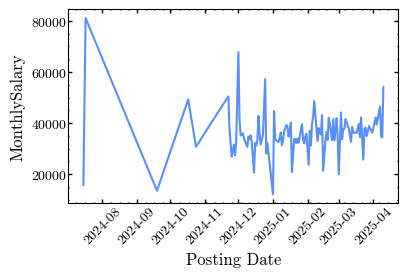

In [25]:
grouped_data = (
    pl_data.group_by("Posting Date")
    .agg(pl.col("MonthlySalary").mean().alias("MonthlySalary"))
    .filter(pl.col("Posting Date") > pl.lit("2024-04-01", pl.Date))
)
sns.lineplot(data=grouped_data, x="Posting Date", y="MonthlySalary")

plt.xticks(rotation=45)


C:\Users\Andrei\AppData\Local\Temp\ipykernel_12044\310559061.py:10: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))


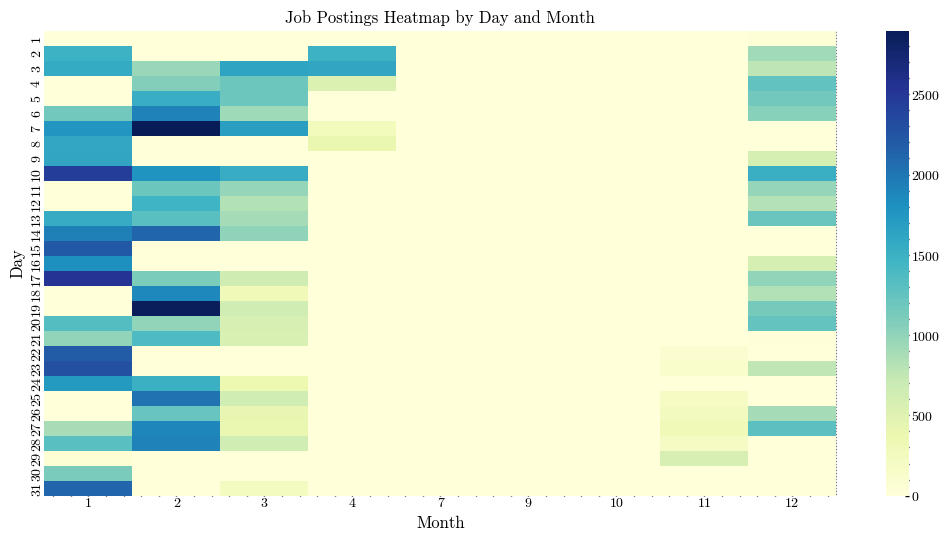

In [16]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count job postings per date
heatmap_data = (
    pl_data
    .group_by("Posting Date")
    .agg(pl.count().alias("count"))
    .sort("Posting Date")
    .to_pandas()
)

# Optional: convert date column to datetime if needed
heatmap_data["Posting Date"] = pd.to_datetime(heatmap_data["Posting Date"])

# Create year/month/day features
heatmap_data["year"] = heatmap_data["Posting Date"].dt.year
heatmap_data["month"] = heatmap_data["Posting Date"].dt.month
heatmap_data["day"] = heatmap_data["Posting Date"].dt.day

# Pivot to calendar-style table: rows = day, cols = month
pivot_table = heatmap_data.pivot_table(
    values="count",
    index="day",
    columns="month",
    aggfunc="sum",
    fill_value=0
)

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False)
plt.title("Job Postings Heatmap by Day and Month")
plt.xlabel("Month")
plt.ylabel("Day")
plt.show()


C:\Users\Andrei\AppData\Local\Temp\ipykernel_12044\1870936008.py:10: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("count"))


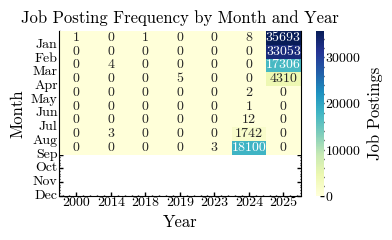

In [ ]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group job postings by posting date
date_counts = (
    pl_data
    .group_by("Posting Date")
    .agg(pl.count().alias("count"))
    .to_pandas()
)

# Step 2: Convert to datetime (if needed)
date_counts["Posting Date"] = pd.to_datetime(date_counts["Posting Date"])

# Step 3: Extract year and month
date_counts["year"] = date_counts["Posting Date"].dt.year
date_counts["month"] = date_counts["Posting Date"].dt.month

# Step 4: Aggregate by year and month
monthly_freq = (
    date_counts.groupby(["year", "month"])["count"]
    .sum()
    .reset_index()
)

# Step 5: Pivot to heatmap format
heatmap_df = monthly_freq.pivot(index="month", columns="year", values="count").fillna(0)

# Step 6: Plot heatmap
# plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Job Postings'})
plt.title("Job Posting Frequency by Month and Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.yticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], rotation=0)

ax = plt.gca()

# ax.spines['left'].set_position(('outward', 10))   # 10 points out
# ax.spines['bottom'].set_position(('outward', 10))
# ax.spines['right'].set_position(('outward', 10))   # 10 points out

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(True)  # 10 points out


plt.tight_layout()
plt.show()
